In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import utilities as util
import datetime as dt
import whoop as wp
import levels as lv
import zero as zo
import plot as pt

# Levels Data

In [20]:
levels = lv.load_levels_data('sandbox/data/levels_scores.csv')
levels.head(2)

Metabolic Score
2020-09-10             60.0
2020-09-11             58.0

# Zero Fasting Data

In [13]:
fasts = zo.load_zero_data('sandbox/data/fasts.csv')
fasts.head(2)

Date  Start    End  Hours  Night Eating
0 2020-07-26  22:52  12:26     13           NaN
1 2020-07-27  21:00  11:15     14           0.0

In [14]:
fast_stats = zo.all_fasts_stats(fasts)
fast_stats.head(2)

Fast (cumulative hours)  Fast (consecutive hours)  \
2020-07-26                 1.133333                  1.133333   
2020-07-27                15.433333                 13.566667   

           Fast Binned (consecutive hours) Fast Binned (cumulative hours) Fast  
2020-07-26                      0-12 hours                     0-12 hours   No  
2020-07-27                     13-15 hours                    16-18 hours  Yes

# Whoop Data

In [12]:
whoop = wp.load_whoop_data('sandbox/data/whoop.csv')
sleep = wp.sleep_metrics(whoop)

sleep.head(2)

Strain  Recovery  Sleep Score  Sleep (hours)
2020-03-20  13.332142      63.0         79.0       7.336175
2020-03-21  16.901529      54.0         96.0       8.661017

# Combine Whoop, Levels, and Fasting Data

In [21]:
all_data = util.create_metrics_dataset(sleep, levels, fast_stats)

In [22]:
all_data.head(2)

Date  Metabolic Score  Strain  Recovery  Sleep Score  Sleep (hours)  \
0  2020-09-10             60.0   17.75      58.0         87.0           7.78   
1  2020-09-11             58.0    5.56      63.0         69.0           6.48   

   Fast (cumulative hours)  Fast (consecutive hours)  \
0                    16.00                     17.50   
1                    12.18                     16.68   

  Fast Binned (consecutive hours) Fast Binned (cumulative hours) Fast  
0                     16-18 hours                    16-18 hours  Yes  
1                     16-18 hours                    13-15 hours  Yes

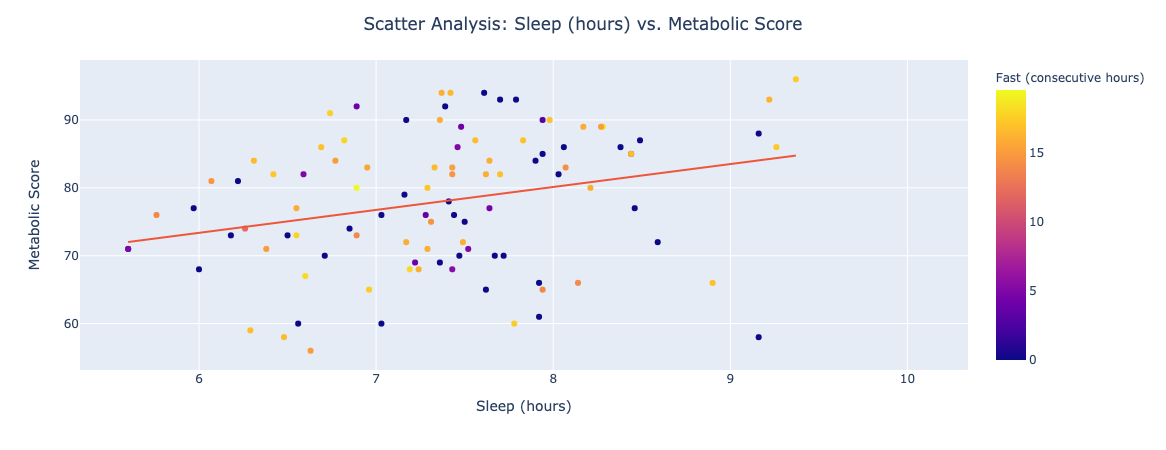

In [25]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

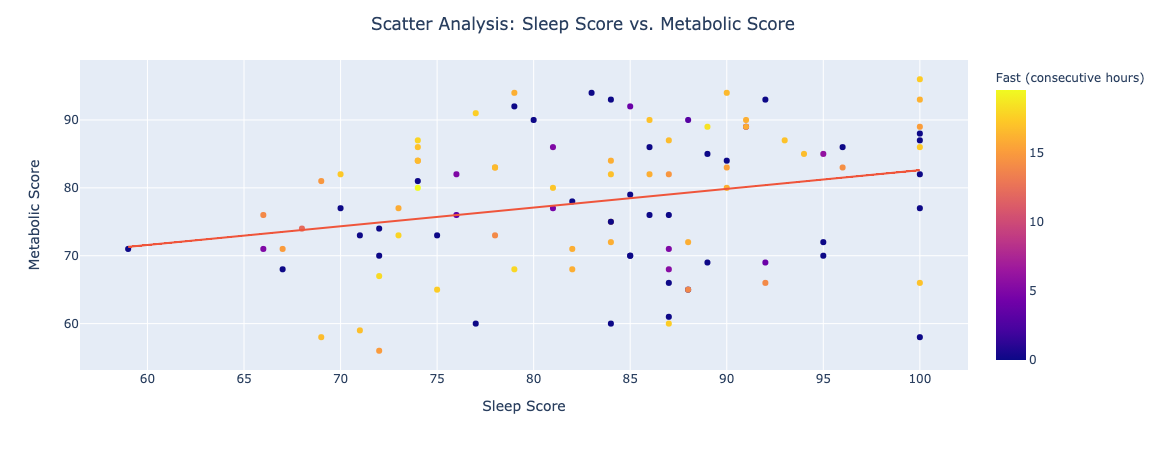

In [26]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep Score",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

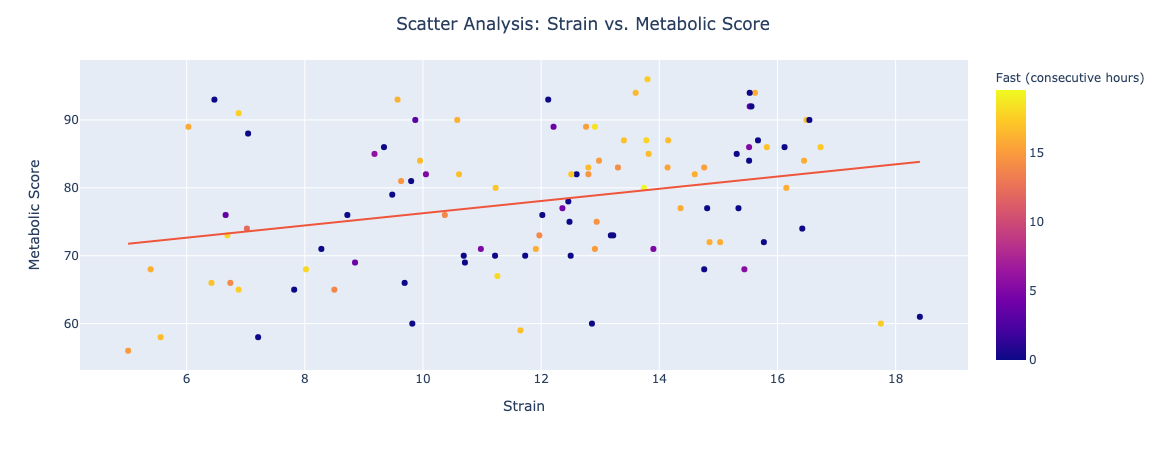

In [27]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

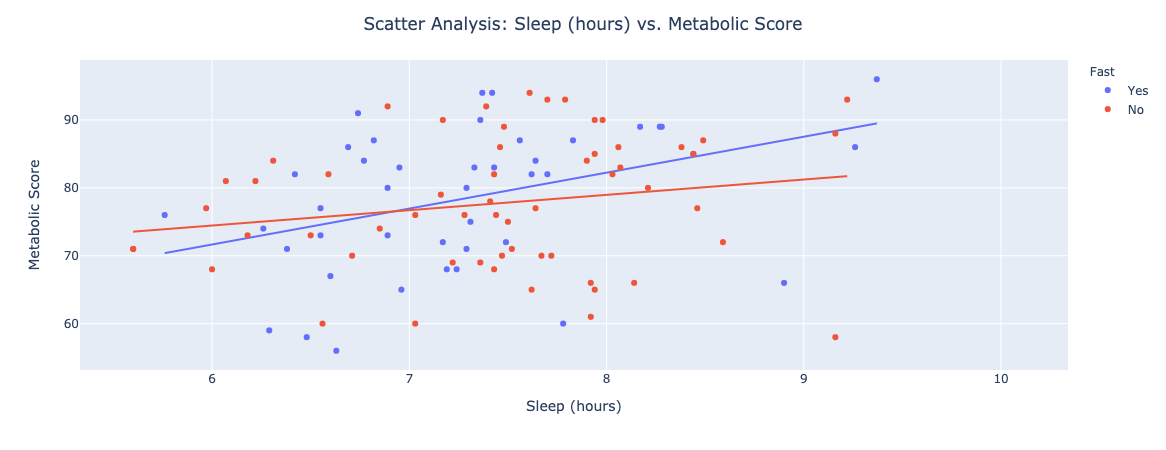

In [28]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

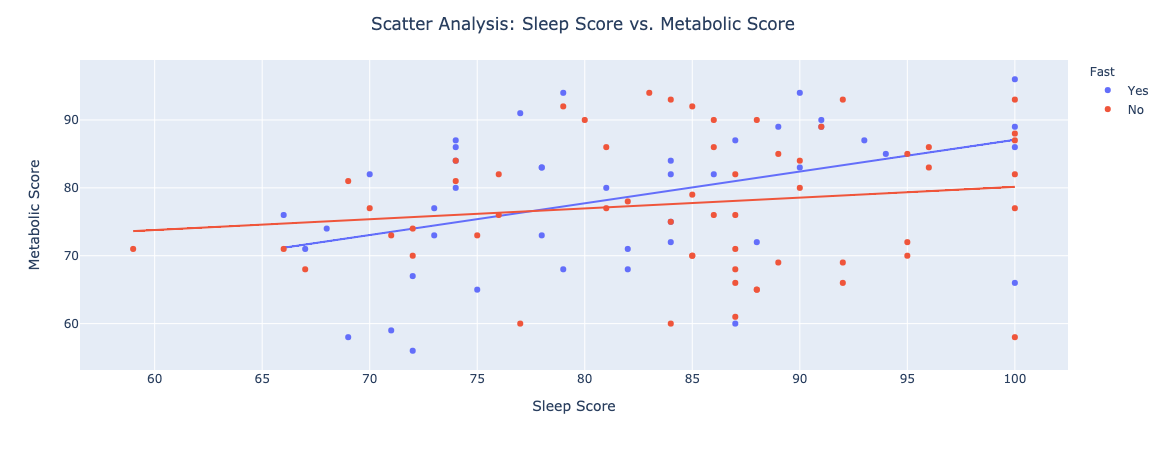

In [29]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep Score",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

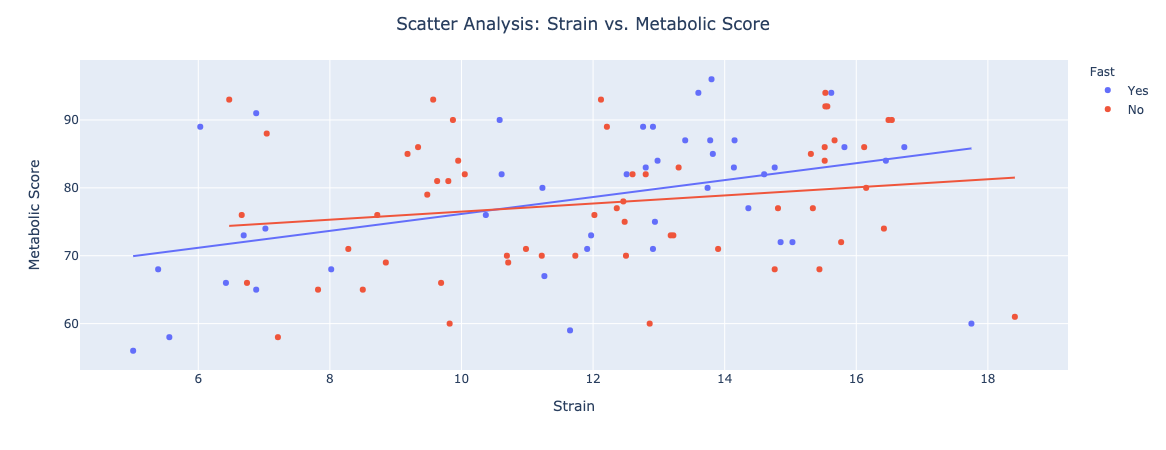

In [30]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

# Remove Outliers
Most of my exteremely low Levels scores come from days where I took on a 'glucose challenge' or had some irregular behavior. I'm, mostly, a creature of habit and care more about my typical biometrics than outlier days. With that said it's relevant to look at the outliers seperately, and this is best done with the Levels 'challenges' and 'Compare Zones' features. 

In [68]:
rm_outliers = all_data.copy()

dates = ['2020-09-10', # insufficient glucose data
         '2020-09-15', # irregular behavior 
         '2020-09-21', # glucose caliberation: banana, strawberries
         '2020-09-24', # glucose caliberation: sweet potato
         '2020-09-24', # glucose challenge: sweets
         '2020-09-28', # glucose calibration: sweet potato (cold)
         '2020-09-29', # glucose challenges: sweets
         '2020-11-01', # irregular behavior
         '2020-11-02', # irregular behavior
         '2020-11-06', # irregular behavior
         '2020-11-21', # irregular behavior
         '2020-11-25', # insufficient glucose data
         '2020-11-26', # insufficient glucose data
         '2020-11-29', # insufficient glucose data
         '2020-12-14', # irregular behavior
         '2020-12-27', # insufficient glucose data
        ]
dropped_dates = util.create_dates(dates = dates)
dropped_indexes = rm_outliers[rm_outliers.Date.isin(dropped_dates)].index

# rm_outliers = rm_outliers.drop(dropped_dates)
rm_outliers = rm_outliers.drop(rm_outliers.index[dropped_indexes]).reset_index(drop=True)

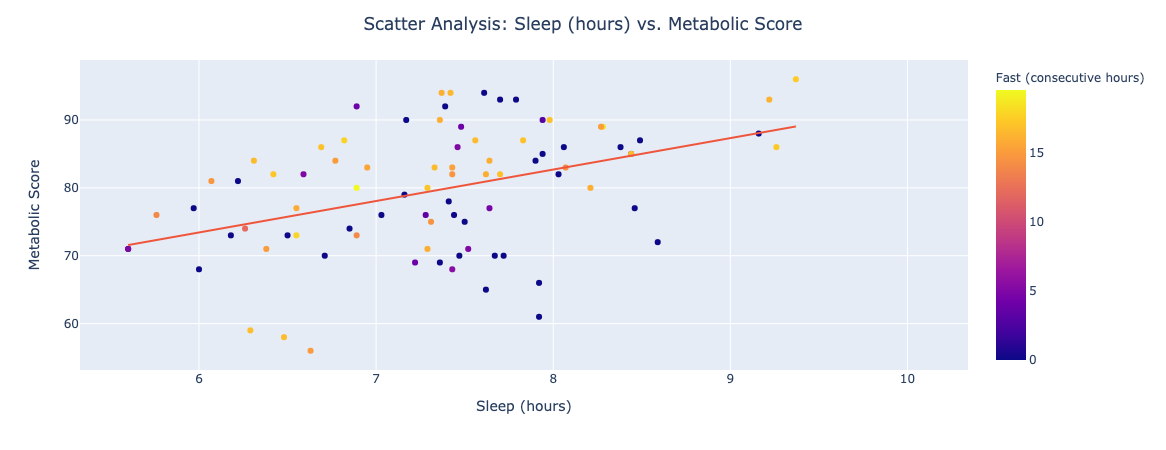

In [44]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast (consecutive hours)",
                        hover=[rm_outliers.index]
                       )
fig.show()

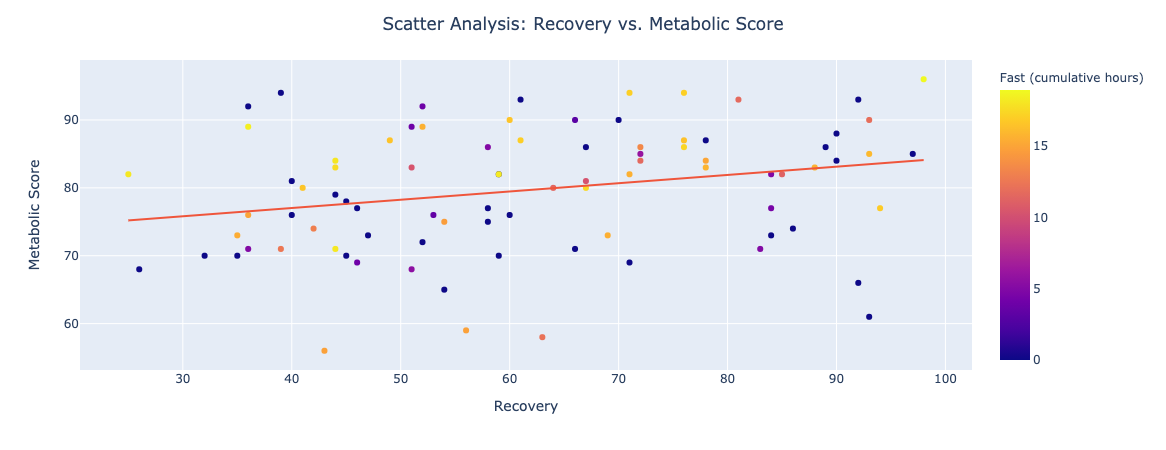

In [45]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Recovery",
                        y_selection="Metabolic Score",
                        color_selection="Fast (cumulative hours)",
                        hover=[rm_outliers.index]
                       )
fig.show()

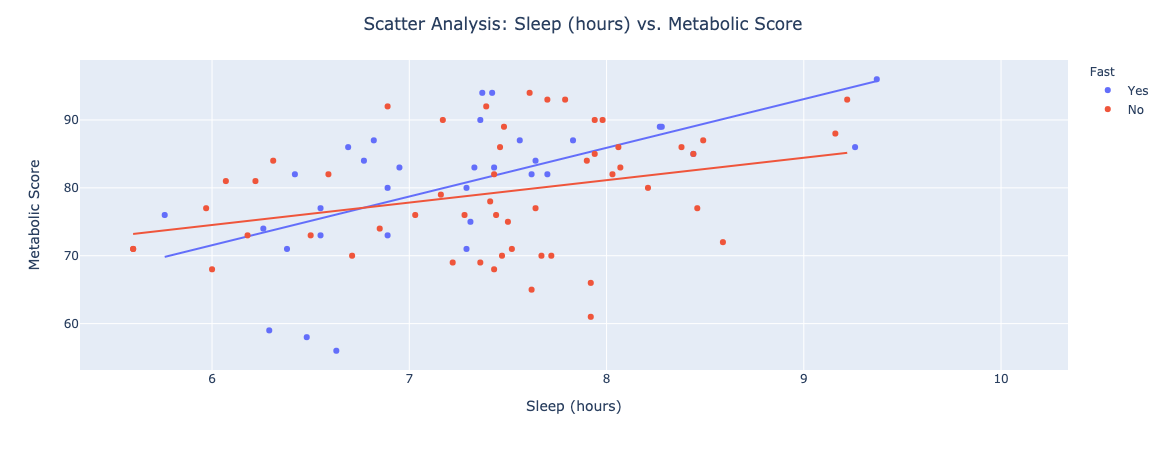

In [47]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hours)",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

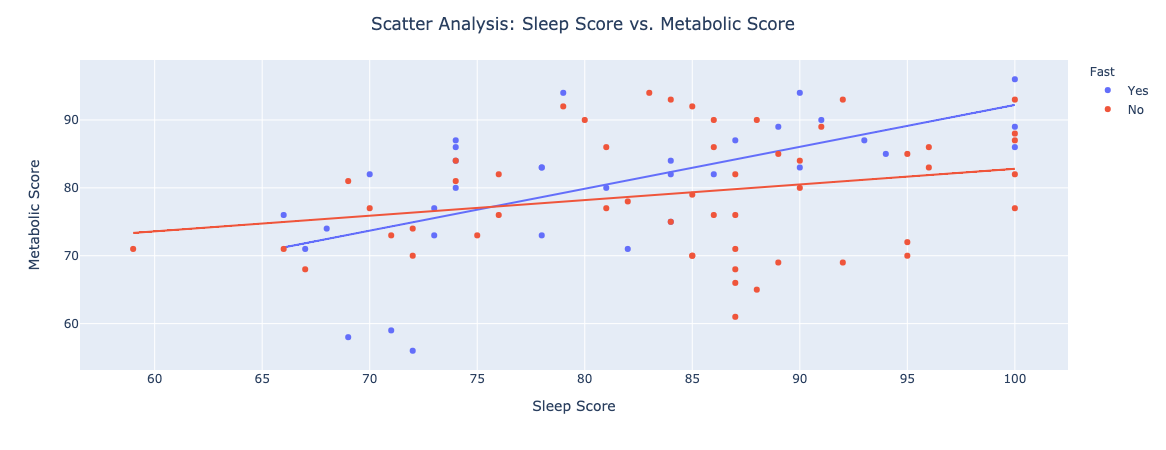

In [48]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep Score",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

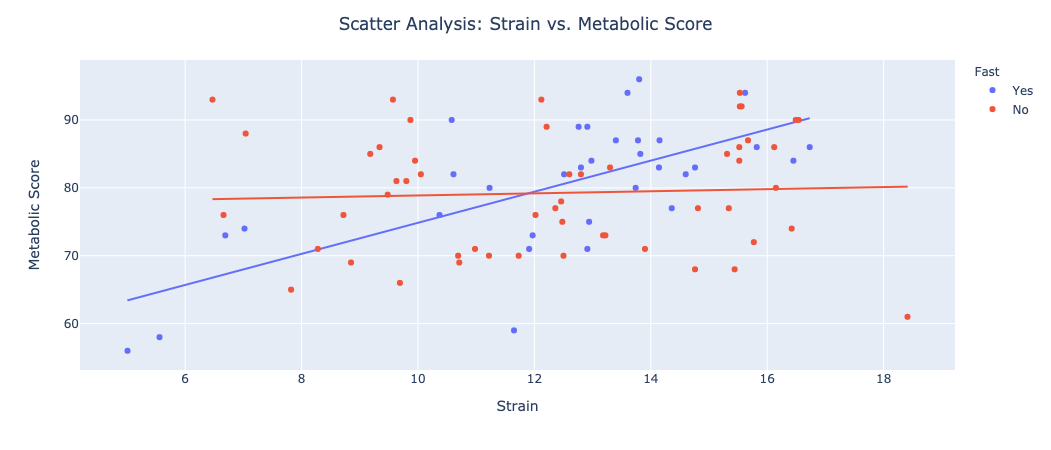

In [94]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Strain",
                        y_selection="Metabolic Score",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

# Add Confidence Intervals to Scatter Best Fit Line
https://community.plotly.com/t/adding-regression-line-and-confidence-interval-to-a-scatter-plot/37086

https://community.plotly.com/t/adding-best-fit-line-linear-regression-line-in-a-scatter-plot/6069/2

https://chart-studio.plotly.com/~empet/14628/boston-housing-regression-line-and-95-confidence-interval-for-the-regression-est/#/

In [104]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     25.72
Date:                Mon, 18 Jan 2021   Prob (F-statistic):           1.75e-05
Time:                        20:17:55   Log-Likelihood:                -111.62
No. Observations:                  33   AIC:                             227.2
Df Residuals:                      31   BIC:                             230.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.9512      5.770      9.003      0.000      40.183      63.720
x1             2.2900      0.452      5.071      0.000       1.369       3.211
==============================================================================
Omnibus:                        1.114   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.526
Skew:                          -0.302   Prob(JB):                        0.769
Kurtosis:                       3.135   Cond. No.                         58.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
pr = util.profile_report(rm_outliers)

In [52]:
pr

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Dictionary

In [93]:
all_data.head()

Date  Metabolic Score  Strain  Recovery  Sleep Score  Sleep (hours)  \
0  2020-09-10             60.0   17.75      58.0         87.0           7.78   
1  2020-09-11             58.0    5.56      63.0         69.0           6.48   
2  2020-09-12             68.0   14.76      26.0         67.0           6.00   
3  2020-09-13             76.0    6.66      53.0         76.0           7.28   
4  2020-09-14             76.0   10.37      36.0         66.0           5.76   

   Fast (cumulative hours)  Fast (consecutive hours)  \
0                    16.00                     17.50   
1                    12.18                     16.68   
2                     0.00                      0.00   
3                     3.50                      3.50   
4                    14.97                     13.97   

  Fast Binned (consecutive hours) Fast Binned (cumulative hours) Fast  
0                     16-18 hours                    16-18 hours  Yes  
1                     16-18 hours                    13-15 hours  Yes  
2                      0-12 hours                     0-12 hours   No  
3                      0-12 hours                     0-12 hours   No  
4                     13-15 hours                    13-15 hours  Yes